In [147]:
import pandas as pd

In [149]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [151]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [153]:
df.shape

(4340, 8)

In [155]:
Marques=[]
for i in range(len(df)):
    c=""
    for j in range(len(df["name"][i])):
        if(df["name"][i][j]== ' '):
            break
        else:
            c=c+df["name"][i][j]
    Marques.append(c)



In [156]:
df["Brand"]=Marques
df["Brand"].replace("Land","Land Rover",inplace=True)


In [158]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [161]:
average_price_by_brand = df.groupby('Brand')['selling_price'].mean()

# Afficher les moyennes de prix pour chaque marque
average_price_by_brand

Brand
Ambassador       1.800000e+05
Audi             1.931633e+06
BMW              2.945385e+06
Chevrolet        2.367271e+05
Daewoo           6.000000e+04
Datsun           2.970269e+05
Fiat             2.834324e+05
Force            3.460000e+05
Ford             5.712731e+05
Honda            5.381468e+05
Hyundai          4.199403e+05
Isuzu            1.500000e+06
Jaguar           2.069166e+06
Jeep             1.530000e+06
Kia              1.300000e+06
Land Rover       3.609800e+06
MG               1.842500e+06
Mahindra         5.877095e+05
Maruti           3.424163e+05
Mercedes-Benz    2.776657e+06
Mitsubishi       8.400000e+05
Nissan           4.499375e+05
OpelCorsa        8.850000e+04
Renault          4.193767e+05
Skoda            4.900147e+05
Tata             2.840834e+05
Toyota           9.243592e+05
Volkswagen       4.710373e+05
Volvo            2.556250e+06
Name: selling_price, dtype: float64

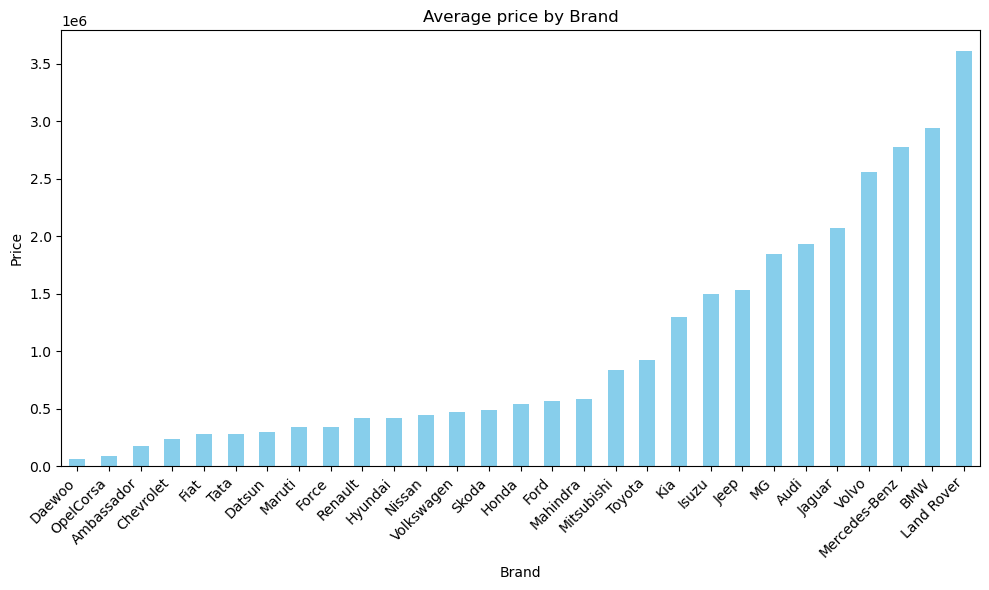

Land rover is the most expensive car


In [163]:
import matplotlib.pyplot as plt
# Créer un histogramme
plt.figure(figsize=(10, 6))
average_price_by_brand.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average price by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher l'histogramme
plt.show()
print("Land rover is the most expensive car")


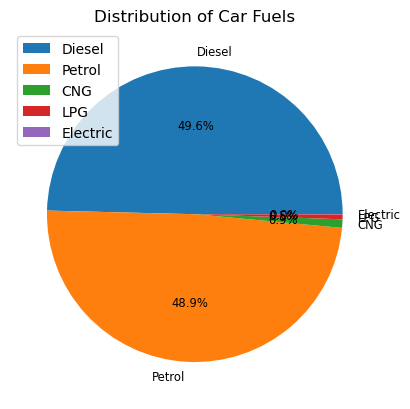

Fuel Types distribution in cars is Dominated by Diesel and Petrol


In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
value_counts = df["fuel"].value_counts()

# Randomly reorder the values

fig, ax = plt.subplots()

ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
       textprops={'size': 'smaller'}, radius=1)
plt.legend()
plt.title('Distribution of Car Fuels')
plt.show()

# Show the plot

print("Fuel Types distribution in cars is Dominated by Diesel and Petrol")

In [167]:
df["year"].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

Majority of first owners are individuals


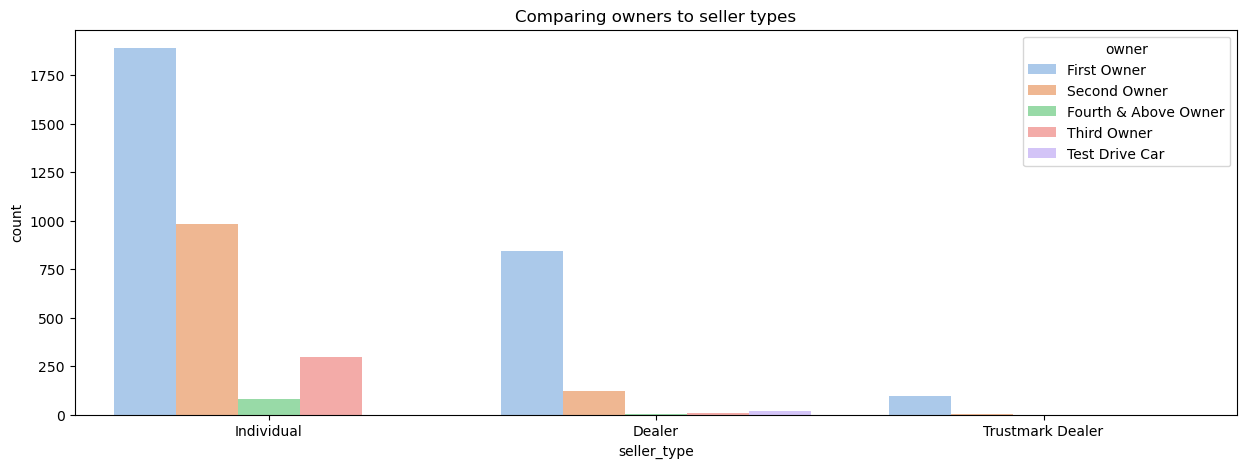

In [169]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(x='seller_type',hue='owner', data=df,palette='pastel')
plt.title('Comparing owners to seller types')
print("Majority of first owners are individuals")

In [171]:
name_encode=pd.get_dummies(df['name'])
fuel_encode=pd.get_dummies(df['fuel'])
seller_type_encode=pd.get_dummies(df['seller_type'])
transmission_encode=pd.get_dummies(df['transmission'])
owner_encode=pd.get_dummies(df['owner'])
Brand_encode=pd.get_dummies(df['Brand'])
df_encoded = pd.concat([df, name_encode], axis=1)


In [173]:

from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical column
name_encode=label_encoder.fit_transform(df["name"])
fuel_encode=label_encoder.fit_transform(df["fuel"])
seller_type_encode=label_encoder.fit_transform(df["seller_type"])
transmission_encode=label_encoder.fit_transform(df["transmission"])
owner_encode=label_encoder.fit_transform(df["owner"])
Brand_encode=label_encoder.fit_transform(df["Brand"])
#df_encoded = pd.concat([df, name_encode], axis=1)
df_encoded=df
df_encoded={"Brand":Brand_encode,"Name":name_encode,"Year":df["year"],"Selling price":df["selling_price"],"Km driven":df["km_driven"],"Fuel":fuel_encode,"Seller type":seller_type_encode,"Transmission":transmission_encode,"Owner":owner_encode}
df_encoded=pd.DataFrame(df_encoded)
df_encoded


,Brand,Name,Year,Selling price,Km driven,Fuel,Seller type,Transmission,Owner
0,18,775,2007,60000,70000,4,1,1,0
1,18,1041,2007,135000,50000,4,1,1,0
2,10,505,2012,600000,100000,1,1,1,0
3,5,118,2017,250000,46000,4,1,1,0
4,9,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...,...
4335,10,602,2014,409999,80000,1,1,1,2
4336,10,601,2014,409999,80000,1,1,1,2
4337,18,777,2009,110000,83000,4,1,1,2
4338,10,381,2016,865000,90000,1,1,1,0


In [175]:
Y=df_encoded["Selling price"]
X=df_encoded.drop(columns="Selling price",axis=1)



In [177]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
# X and y should be numpy arrays or pandas DataFrames/Series
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)


LinearRegression()

In [183]:
# Make predictions
predictions = model.predict(X_test)
predictions

array([ 7.77020384e+05,  6.02790228e+05,  5.72925009e+05,  4.75132950e+05,
        6.08298802e+05,  2.39891492e+04,  5.96828640e+05,  2.90853385e+05,
        7.42484843e+05,  4.06117340e+05,  6.75181475e+05,  3.06032833e+05,
        7.29058538e+05,  4.19643022e+04,  1.23326881e+04,  2.25207745e+05,
        5.33798952e+05,  4.56083411e+05,  4.38932154e+05,  5.78900677e+05,
        2.98095633e+05,  5.30531446e+05, -4.29947648e+04,  4.25672811e+05,
        7.08326418e+05,  4.14949544e+05,  4.73100598e+05,  6.54032853e+05,
        6.86517213e+05,  3.93974700e+05,  4.03432339e+05,  2.06214382e+04,
        6.12664906e+05,  8.13606112e+05,  6.19124877e+05,  6.17608038e+05,
        4.90005425e+05,  4.28914602e+05,  8.74884343e+04,  4.14801430e+05,
        3.76897499e+05,  2.98003702e+05,  1.60935950e+05,  1.72557000e+05,
        4.98223293e+05,  6.66921457e+05,  3.73300950e+05,  3.91289124e+05,
        5.97571046e+05,  1.91005107e+05,  1.02778484e+06,  7.94100095e+05,
        3.07895995e+05, -

In [185]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 151364399048.73083
R-squared: 0.5000446871649252


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_train, y_train)
prediction = RigeModel.predict(X_test)


In [189]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
#X_train, X_test, y_train, y_test

Mean Squared Error: 151369708053.71942
R-squared: 0.5000271515669472
